In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Hospital_Patient_Data.csv')
df

,Patient_ID,Age,Gender,Visit_Date,Department,Diagnosis,Treatment_Cost,Visit_Duration,Hospital_Branch
0,P1000,52,Female,2024-01-01,Cardiology,Fracture,13738,11,Mumbai
1,P1001,15,Male,2024-01-02,Cardiology,Fracture,30797,4,Chennai
2,P1002,72,Male,2024-01-03,General Surgery,Fracture,49498,11,Patna
3,P1003,61,Female,2024-01-04,General Surgery,Diabetes,13120,12,Chennai
4,P1004,21,Male,2024-01-05,Orthopedics,Migraine,10767,2,Delhi
...,...,...,...,...,...,...,...,...,...
995,P1995,18,Female,2026-09-22,General Surgery,Migraine,5849,14,Chennai
996,P1996,40,Male,2026-09-23,Cardiology,Heart Disease,14360,5,Chennai
997,P1997,72,Female,2026-09-24,Pediatrics,Heart Disease,47536,7,Mumbai
998,P1998,39,Female,2026-09-25,Pediatrics,Asthma,31231,1,Chennai


In [41]:
df=pd.DataFrame(df,columns=["Treatment_Cost","Visit_Duration"])
df=df.sort_index(axis=0,ascending=False)
print(df)




     Treatment_Cost  Visit_Duration
999           47800               8
998           31231               1
997           47536               7
996           14360               5
995            5849              14
..              ...             ...
4             10767               2
3             13120              12
2             49498              11
1             30797               4
0             13738              11

[1000 rows x 2 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient_ID       1000 non-null   object
 1   Age              1000 non-null   int64 
 2   Gender           1000 non-null   object
 3   Visit_Date       1000 non-null   object
 4   Department       1000 non-null   object
 5   Diagnosis        1000 non-null   object
 6   Treatment_Cost   1000 non-null   int64 
 7   Visit_Duration   1000 non-null   int64 
 8   Hospital_Branch  1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [8]:
df.dtypes

Patient_ID         object
Age                 int64
Gender             object
Visit_Date         object
Department         object
Diagnosis          object
Treatment_Cost      int64
Visit_Duration      int64
Hospital_Branch    object
dtype: object

In [13]:
df['Visit_Date'] = pd.to_datetime(df['Visit_Date'])

In [14]:
df.dtypes

Patient_ID                 object
Age                         int64
Gender                     object
Visit_Date         datetime64[ns]
Department                 object
Diagnosis                  object
Treatment_Cost              int64
Visit_Duration              int64
Hospital_Branch            object
dtype: object

In [15]:
df.isnull().sum()

Patient_ID         0
Age                0
Gender             0
Visit_Date         0
Department         0
Diagnosis          0
Treatment_Cost     0
Visit_Duration     0
Hospital_Branch    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [22]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Visit_Date', 'Department', 'Diagnosis',
       'Treatment_Cost', 'Visit_Duration', 'Hospital_Branch'],
      dtype='object')

In [12]:
df.describe()

,Age,Treatment_Cost,Visit_Duration
count,1000.000000,1000.000000,1000.00000
mean,43.314000,25882.399000,7.69800
std,25.834102,13558.756143,4.07104
min,1.000000,2112.000000,1.00000
25%,21.000000,14442.750000,4.00000
50%,44.000000,25549.500000,8.00000
75%,64.000000,37257.750000,11.00000
max,89.000000,49857.000000,14.00000


In [24]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Visit_Date', 'Department', 'Diagnosis',
       'Treatment_Cost', 'Visit_Duration', 'Hospital_Branch'],
      dtype='object')

# EDA(Explotary data Analysys)

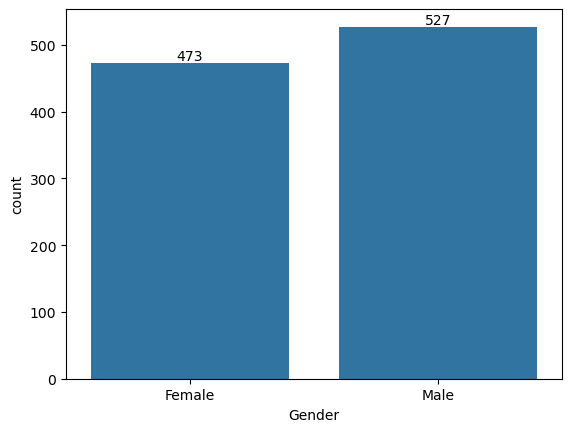

In [45]:
x = sns.countplot(x='Gender', data=df)
for bar in x.containers:
    x.bar_label(bar)

plt.show()


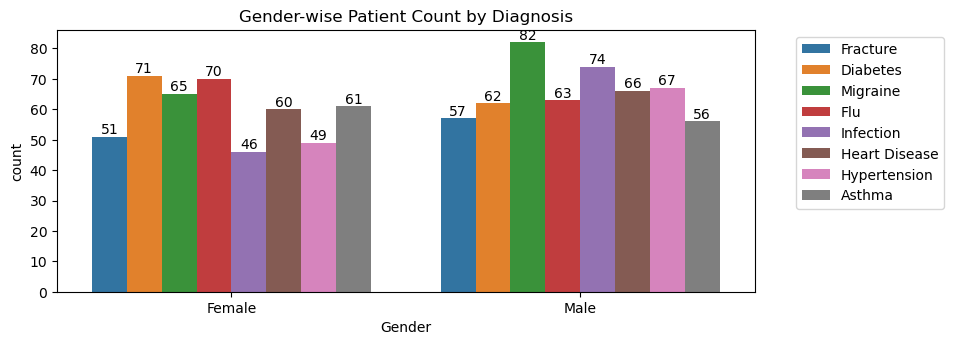

In [6]:
plt.figure(figsize=(9,3.4))
x = sns.countplot(x='Gender',hue='Diagnosis',data=df)
for bar in x.containers:
    x.bar_label(bar)
    plt.title("Gender-wise Patient Count by Diagnosis")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()

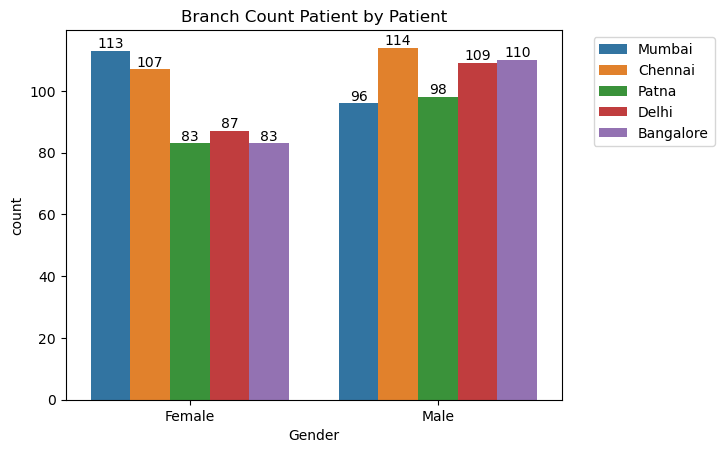

In [14]:
x=sns.countplot(x='Gender',hue='Hospital_Branch',data=df)
for bar in x.containers:
    x.bar_label(bar)
    plt.title("Branch Count Patient by Patient")
    plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.show()

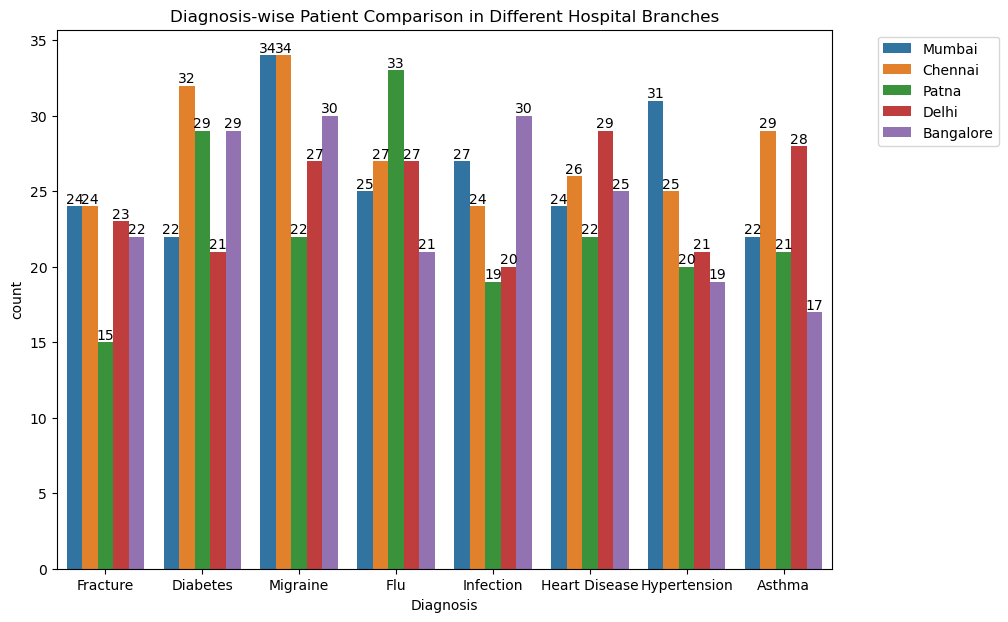

In [19]:
plt.figure(figsize=(10, 7))
x=sns.countplot(x='Diagnosis',hue='Hospital_Branch',data=df)
for bar in x.containers:
    x.bar_label(bar)
    plt.title("Diagnosis-wise Patient Comparison in Different Hospital Branches")
    plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.show()


In [10]:
# Step 1: Group by Department and Hospital_Branch
result = df.groupby(['Diagnosis', 'Hospital_Branch'])['Treatment_Cost'].sum().reset_index()

# Step 2: Sort in descending order
sorted_result = result.sort_values(by='Treatment_Cost', ascending=False)

# Step 3: Get top 10
top_10 = sorted_result.head(10)

# Step 4: Show result
print(top_10)


        Diagnosis Hospital_Branch  Treatment_Cost
28   Hypertension          Mumbai          965914
14            Flu           Patna          887530
36       Migraine         Chennai          851518
38       Migraine          Mumbai          840165
30      Infection       Bangalore          821993
6        Diabetes         Chennai          804059
22  Heart Disease           Delhi          796251
33      Infection          Mumbai          769262
5        Diabetes       Bangalore          756544
21  Heart Disease         Chennai          741309


In [20]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Visit_Date', 'Department', 'Diagnosis',
       'Treatment_Cost', 'Visit_Duration', 'Hospital_Branch'],
      dtype='object')